In [37]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory("C:/Users/KIIT/OneDrive/Desktop/Gender Dataset/Train",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_datagen.flow_from_directory( "C:/Users/KIIT/OneDrive/Desktop/Gender Dataset/Validation",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [40]:
from keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )
hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=64,
                    validation_steps=64,
                    epochs=50)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_33300\828364646.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/50
64/64 [==============================] - 699s 11s/step - loss: 1.8608 - accuracy: 0.5568 - val_loss: 0.7888 - val_accuracy: 0.6069
Epoch 2/50
64/64 [==============================] - 584s 9s/step - loss: 0.6828 - accuracy: 0.5743 - val_loss: 0.6652 - val_accuracy: 0.6102
Epoch 3/50
64/64 [==============================] - 578s 9s/step - loss: 0.6813 - accuracy: 0.5761 - val_loss: 0.6784 - val_accuracy: 0.5750
Epoch 4/50
64/64 [==============================] - 559s 9s/step - loss: 0.6733 - accuracy: 0.5848 - val_loss: 0.6371 - val_accuracy: 0.6548
Epoch 5/50
64/64 [==============================] - 663s 10s/step - loss: 0.6289 - accuracy: 0.6429 - val_loss: 0.5671 - val_accuracy: 0.6898
Epoch 6/50
64/64 [==============================] - 598s 9s/step - loss: 0.5740 - accuracy: 0.7013 - val_loss: 0.4823 - val_accuracy: 0.7719
Epoch 7/50
64/64 [==============================] - 576s 9s/step - loss: 0.5487 - accuracy: 0.7297 - val_loss: 0.9561 - val_accuracy: 0.5218
Epoch 8/50


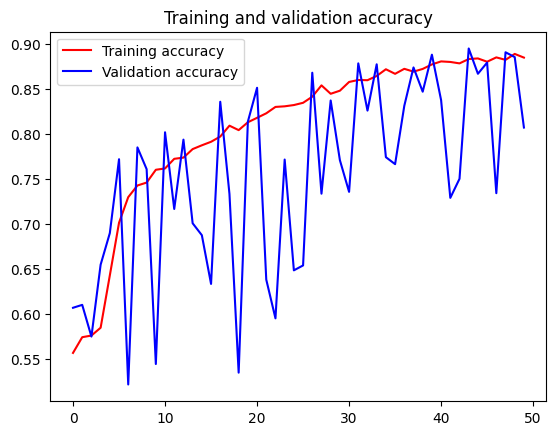

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 36ms/step
[1.7987019e-05]
is a female


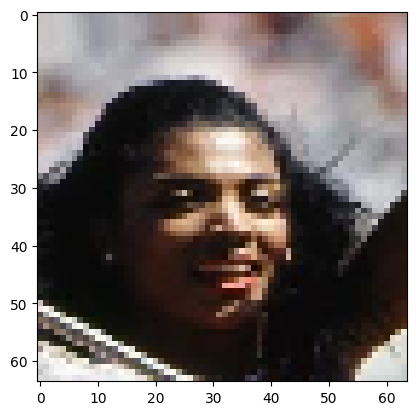

In [83]:
import numpy as np

from tensorflow.keras.preprocessing import image
# predicting images
path = "C:/Users/KIIT/OneDrive/Desktop/Gender Dataset/Test/Female/160003.jpg"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( "is a female")
plt.imshow(img)